In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib

path=r'/Users/jessicagiron/Desktop/Insurance Predictor Python Project/02 Data/df_clean'
print(path)
df=pd.read_csv(path, index_col=False)

/Users/jessicagiron/Desktop/Insurance Predictor Python Project/02 Data/df_clean


In [3]:
#ensure that the most updated version on matplotlib is running
matplotlib.__version__

'3.7.0'

In [2]:
# This option ensures the charts created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
#fix any remaining issues
df= df.drop(['Unnamed: 0'], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df.rename(columns={'children':'number_of_children','charges':'annual_insurance_cost'}, inplace=True)

In [20]:
df.rename(columns={'anual_insurance_cost':'annual_insurance_cost'}, inplace=True)

# Correlations of Quantative 

In [21]:
#Create a subset including quantative data only

sub_quan= df[['age','bmi','number_of_children','annual_insurance_cost']]

In [22]:
#create a correlation matrix using pandas

sub_quan.corr()

,age,bmi,number_of_children,annual_insurance_cost
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
number_of_children,0.041536,0.012755,1.000000,0.067389
annual_insurance_cost,0.298308,0.198401,0.067389,1.000000


/var/folders/w4/gggschwn6vl43xxxrphzmdt40000gn/T/ipykernel_67146/4229972465.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


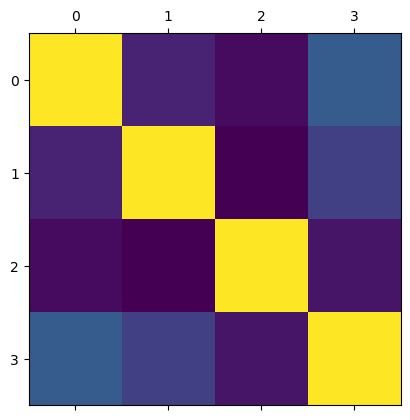

In [23]:
#correlation heatmap by matplotlib

plt.matshow(df.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

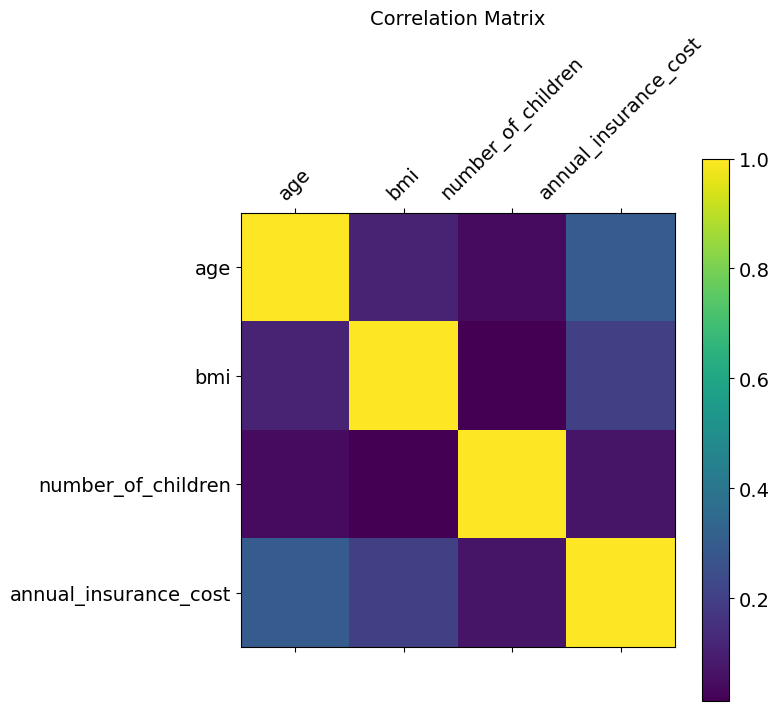

In [27]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(7, 7)) # figure size 
plt.matshow(sub_quan.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub_quan.shape[1]), sub_quan.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub_quan.shape[1]), sub_quan.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

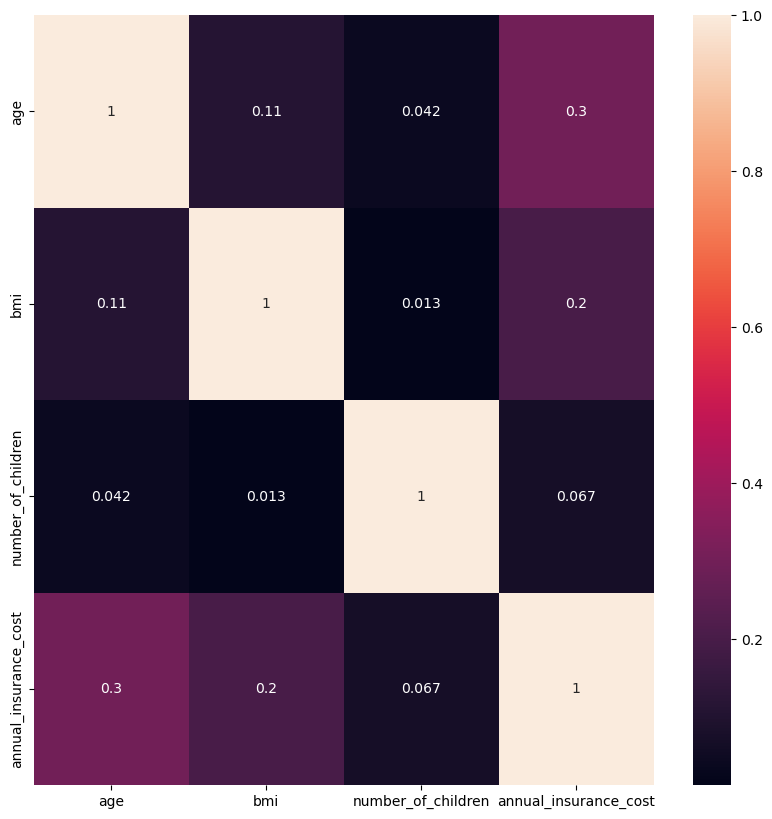

In [28]:
#Creating a correlation heatmap using seaborn instead of matplotlib

# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub_quan.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

# Scatterplots

In [30]:
df.columns

Index(['age', 'sex', 'bmi', 'number_of_children', 'smoker', 'region',
       'annual_insurance_cost'],
      dtype='object')

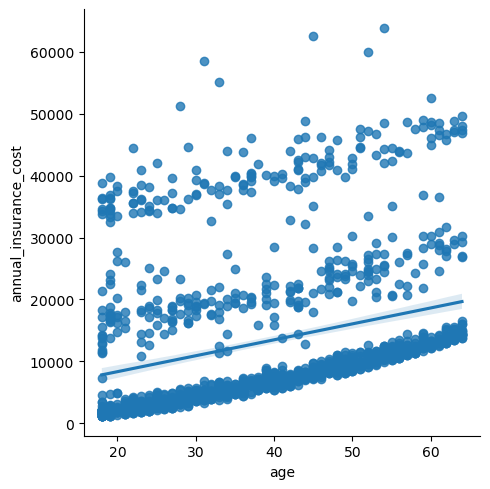

In [38]:
# Create a scatterplot in seaborn

#The correlation between age and annual insurance cost is very weak, but there is a trend that the older the policyholder the more the cost

sns.lmplot(x = 'age', y = 'annual_insurance_cost', data = df)

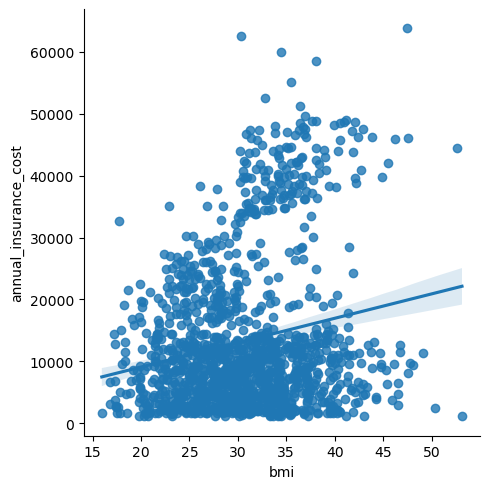

In [39]:
#weak correlation between bmi and total cost, there is a trend that the higher the BMI the higher the cost

sns.lmplot(x = 'bmi', y = 'annual_insurance_cost', data = df)

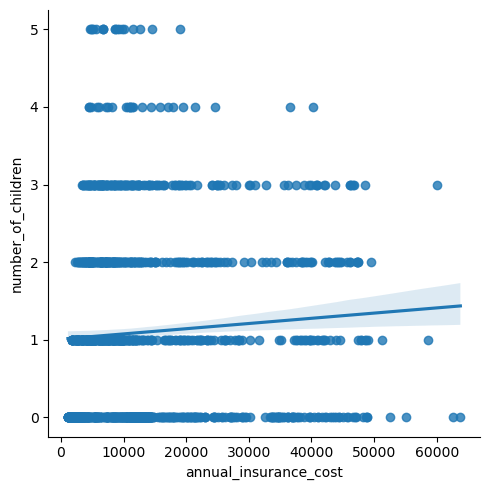

In [37]:
#there is very weak correlation between the cost and the number of children

sns.lmplot(x = 'annual_insurance_cost', y = 'number_of_children', data = df)

# Pair Plots

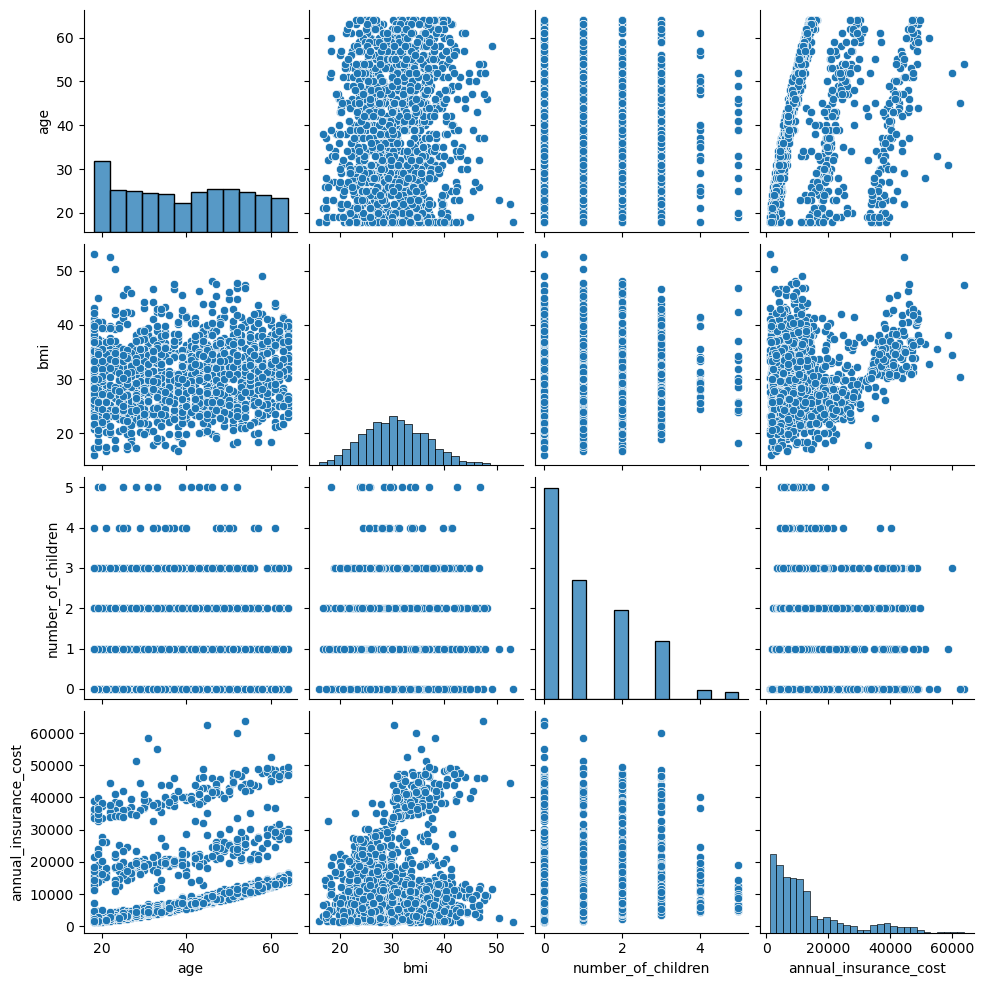

In [40]:
g = sns.pairplot(sub_quan)

# Categorical Plots

<Axes: xlabel='annual_insurance_cost', ylabel='Count'>

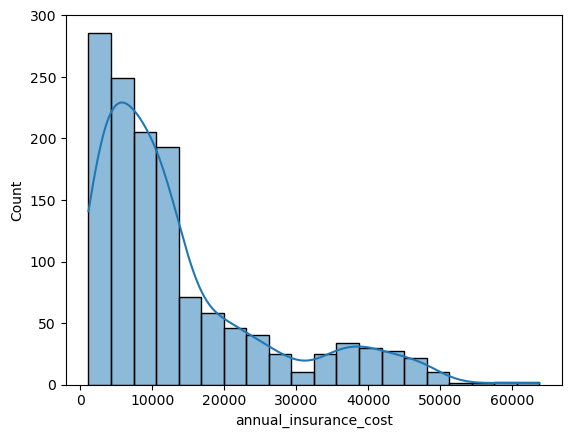

In [42]:
#Histogram
#The argument "kde" add a line that encompasses the distribution

sns.histplot(df['annual_insurance_cost'], bins = 20, kde = True)

In [45]:
df.describe()

,age,bmi,number_of_children,annual_insurance_cost
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [55]:
#create insurance cost flag based on histogram distribution

df.loc[df['annual_insurance_cost'] < 4747, 'cost_category']='Low Cost'
df.loc[(df['annual_insurance_cost'] >=9387) & (df['annual_insurance_cost'] <16658), 'cost_category']= 'Mid Cost'
df.loc[df['annual_insurance_cost'] >=16658, 'cost_category']='High Cost'


In [56]:
df['cost_category'].value_counts()

Low Cost     669
High Cost    334
Mid Cost     334
Name: cost_category, dtype: int64

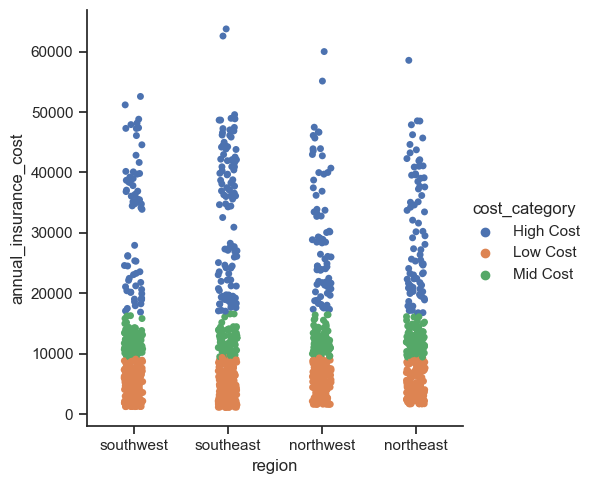

In [57]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="region", y="annual_insurance_cost", hue="cost_category", data=df)

In [58]:
df.to_csv(os.path.join('/Users/jessicagiron/Desktop/Insurance Predictor Python Project/02 Data','df.2'))